In [104]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import utils
import networkx as nx
from typing import List
import importlib
import os

In [105]:
centrality_types = ["closeness", "degree", "betweenness", "eigenvector"]
interactions: dict = utils.load_json("data/starwars-full-interactions.json")
G = nx.Graph(name="Interactions")
G = utils.get_graph_with_nodes_and_edges(G, interactions)

# Network Metrics
- Is there a change from episode 1 to episode 6?
- Are there signs for cliques?
- How tightly-knit is the network?

## Graph Density
- How likely is it that nodes connect?
- Higher density suggests a tightly-knit network

In [106]:
interaction_file_names: List[str] = [i for i in os.listdir("data/") if "full" not in i and "interactions" in i and not "allCharacters" in i]
for interaction in interaction_file_names:
    G_tmp = nx.Graph(name="Interactions")
    G_tmp = utils.get_graph_with_nodes_and_edges(G_tmp, utils.load_json(f"data/{interaction}"))
    print("Episode:", interaction.split("-")[2])
    print("Density:", nx.density(G_tmp))


Episode: 1
Density: 0.19369369369369369
Episode: 4
Density: 0.24210526315789474
Episode: 5
Density: 0.23976608187134502
Episode: 3
Density: 0.20652173913043478
Episode: 6
Density: 0.2679738562091503
Episode: 2
Density: 0.1975806451612903
Episode: 7
Density: 0.2427536231884058


## Cluster Coefficient
The higher the value the more clique formation there is

In [107]:
interaction_file_names: List[str] = [i for i in os.listdir("data/") if "full" not in i and "interactions" in i and not "allCharacters" in i]
for interaction in interaction_file_names:
    G_tmp = nx.Graph(name="Interactions")
    G_tmp = utils.get_graph_with_nodes_and_edges(G_tmp, utils.load_json(f"data/{interaction}"))
    print("Episode:", interaction.split("-")[2])
    print("Cluster Coefficient:", nx.transitivity(G_tmp))

Episode: 1
Cluster Coefficient: 0.44637462235649544
Episode: 4
Cluster Coefficient: 0.5
Episode: 5
Cluster Coefficient: 0.5217391304347826
Episode: 3
Cluster Coefficient: 0.453125
Episode: 6
Cluster Coefficient: 0.5726141078838174
Episode: 2
Cluster Coefficient: 0.5011682242990654
Episode: 7
Cluster Coefficient: 0.5986842105263158


# Centralities

**Temporal Analysis**

Evolution of Centralities: how does a centrality value evolve over episodes? (to identify central characters or their changing roles)

## Degree

 - TODO add discussion about results

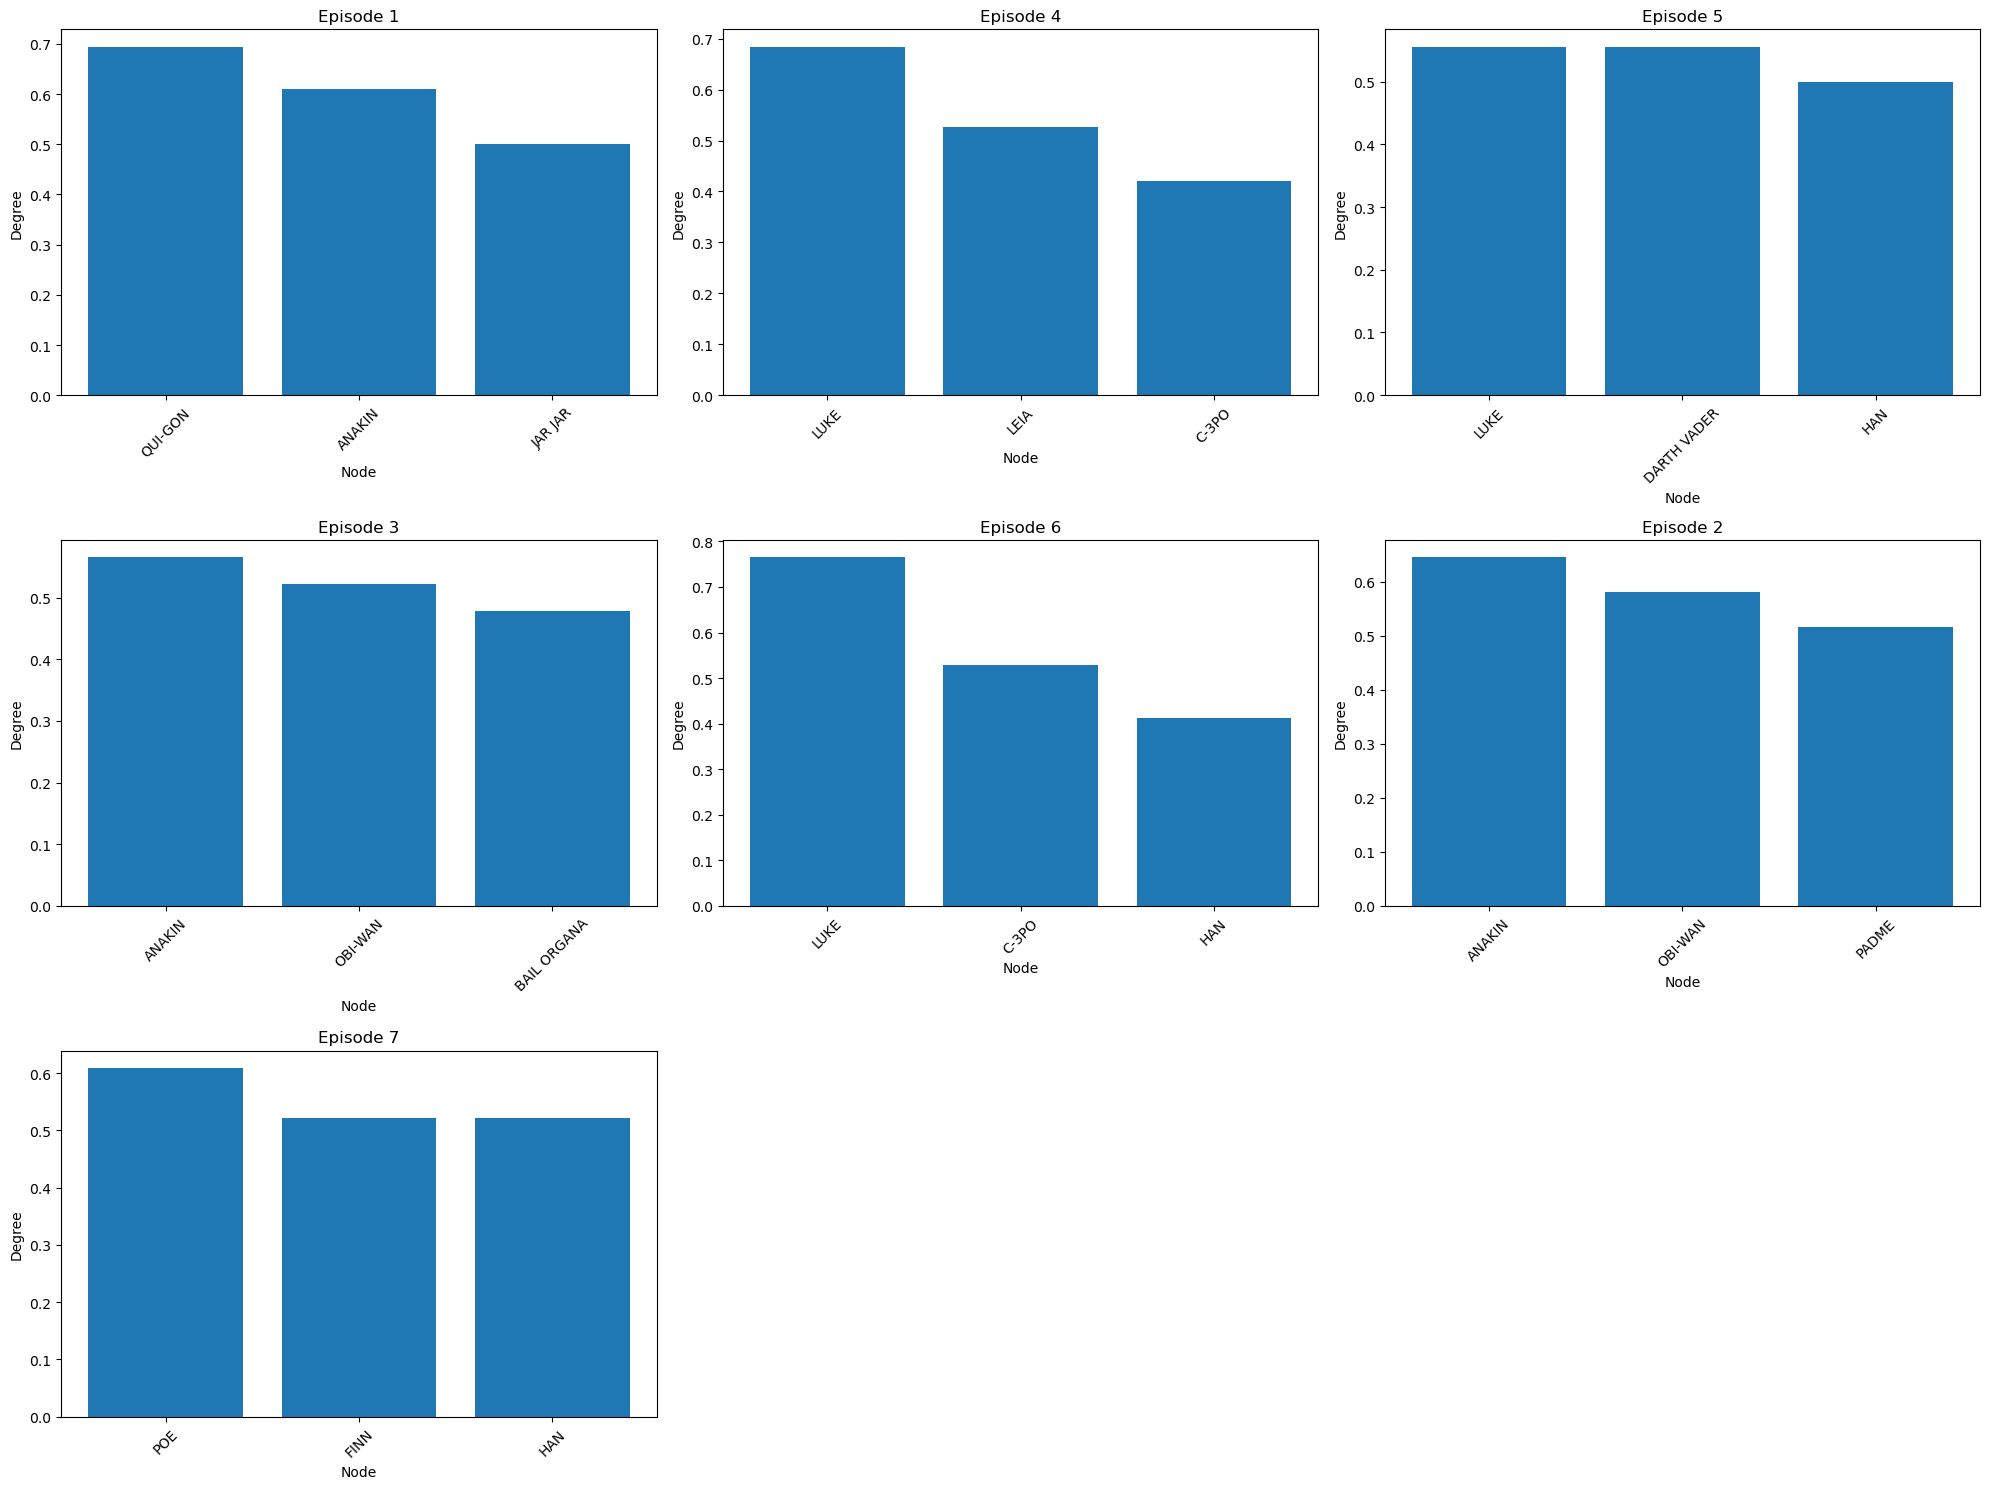

In [108]:
import os
import networkx as nx
import plots
importlib.reload(plots)
from plots import plot_centrality_over_time

# Filter interaction files
interaction_files = [
    f for f in os.listdir("data/")
    if "full" not in f and "interactions" in f and "allCharacters" not in f
]

plot_centrality_over_time(G, interaction_files, centrality_type="degree")

## Closeness

Who can reach quickly others?

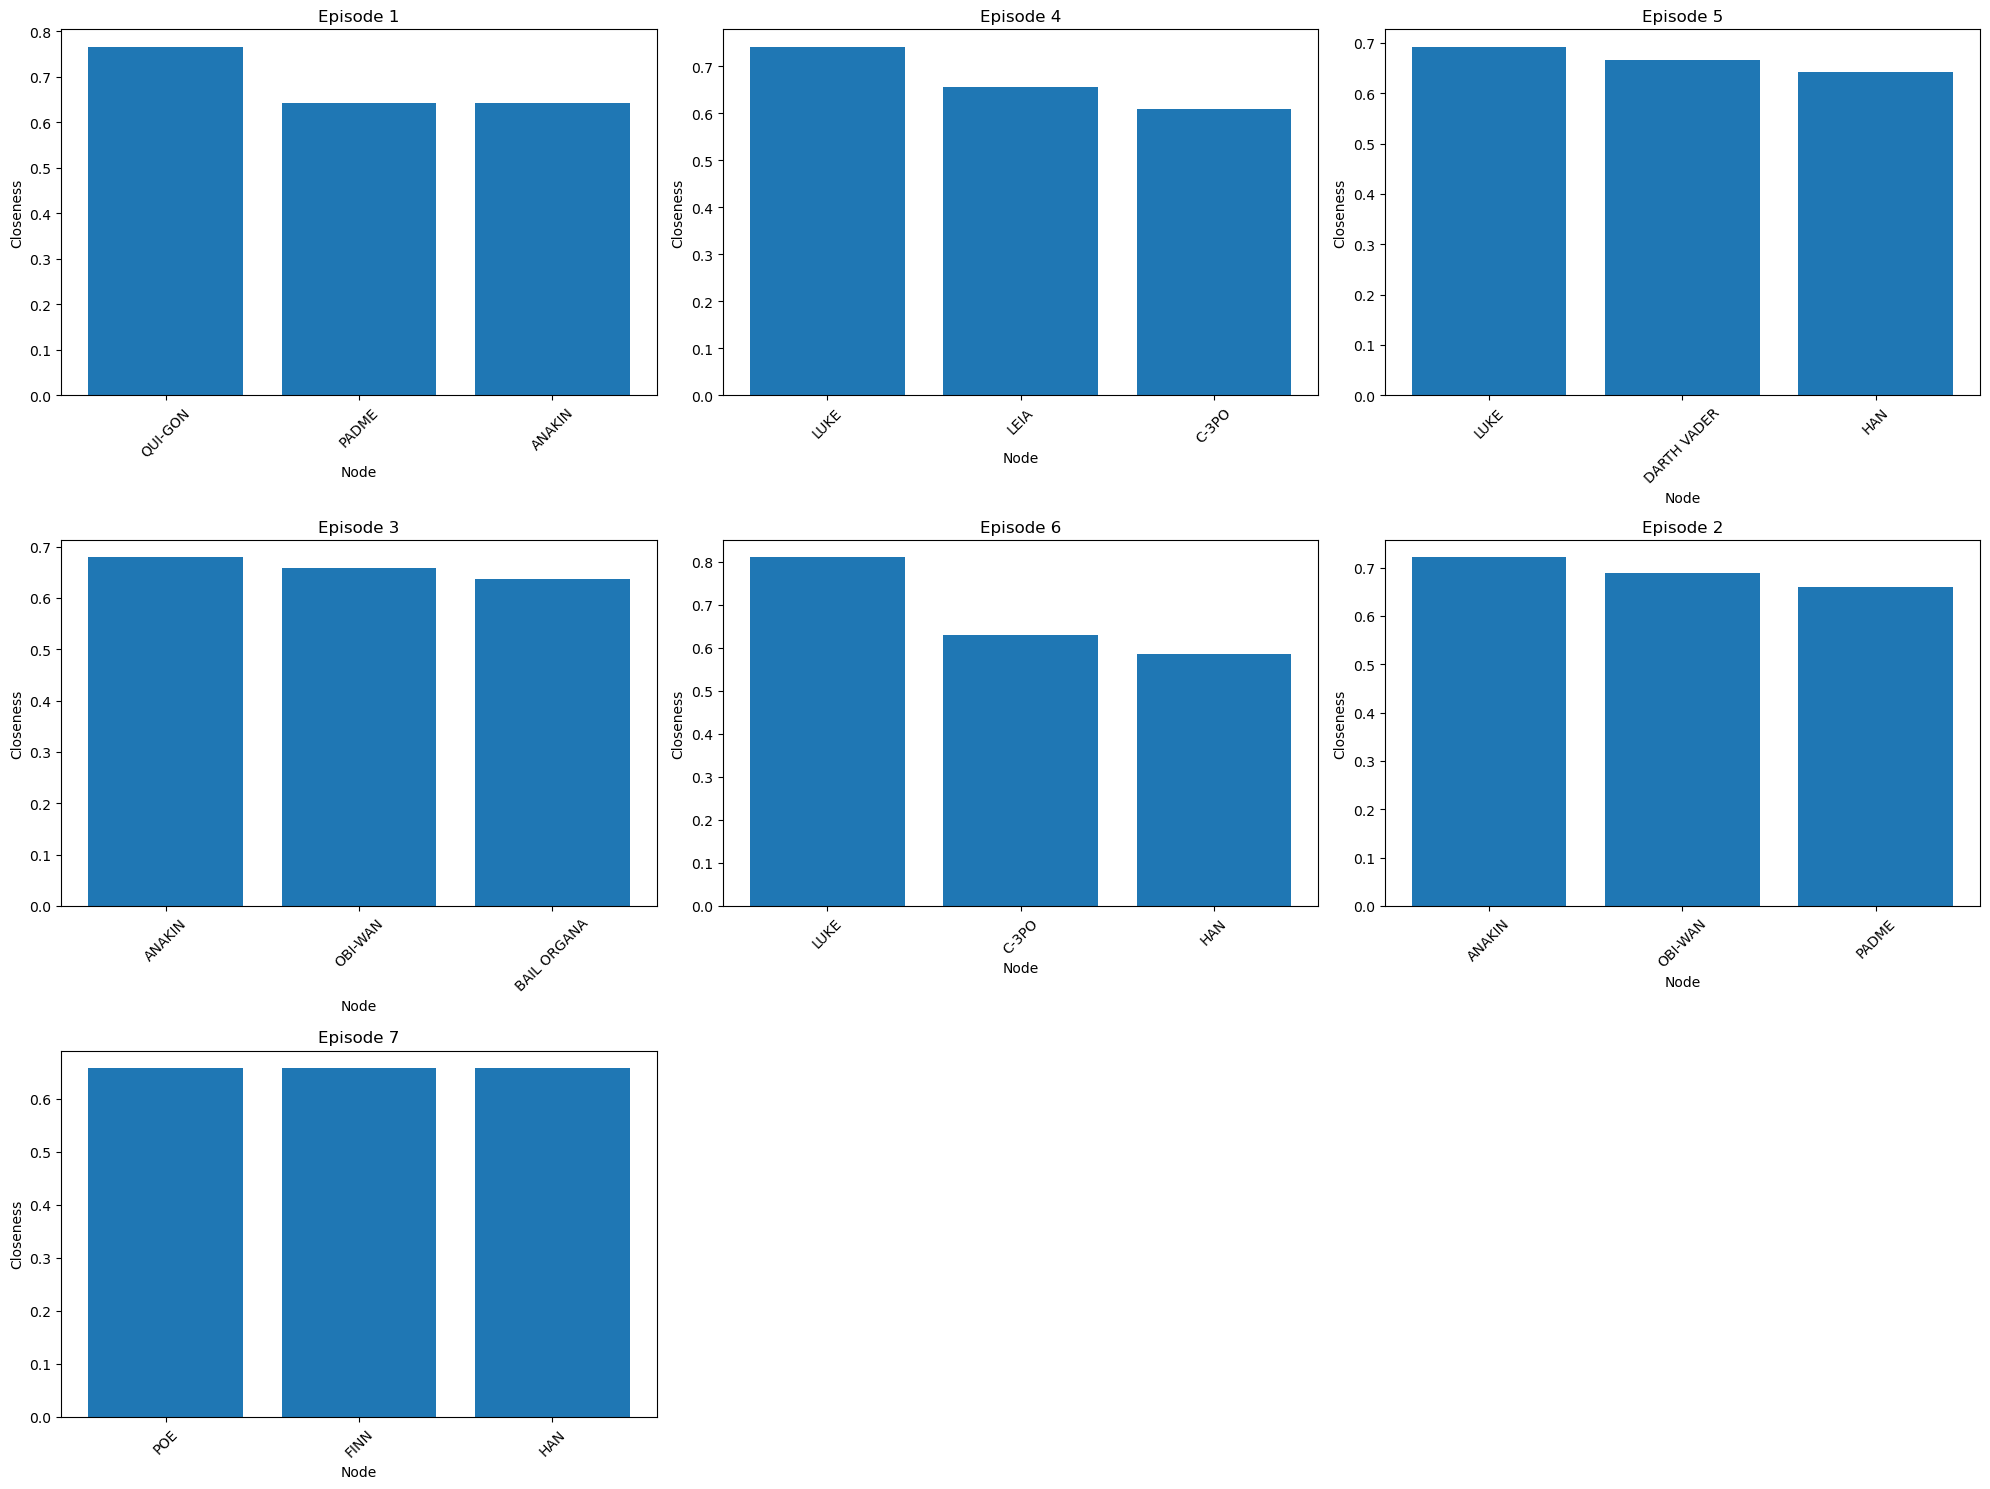

In [109]:
import os
import networkx as nx
import plots
importlib.reload(plots)
from plots import plot_centrality_over_time

# Filter interaction files
interaction_files = [
    f for f in os.listdir("data/")
    if "full" not in f and "interactions" in f and "allCharacters" not in f
]

plot_centrality_over_time(G, interaction_files, centrality_type="closeness")

## Betweenness
Which figures connect different parts of the network?

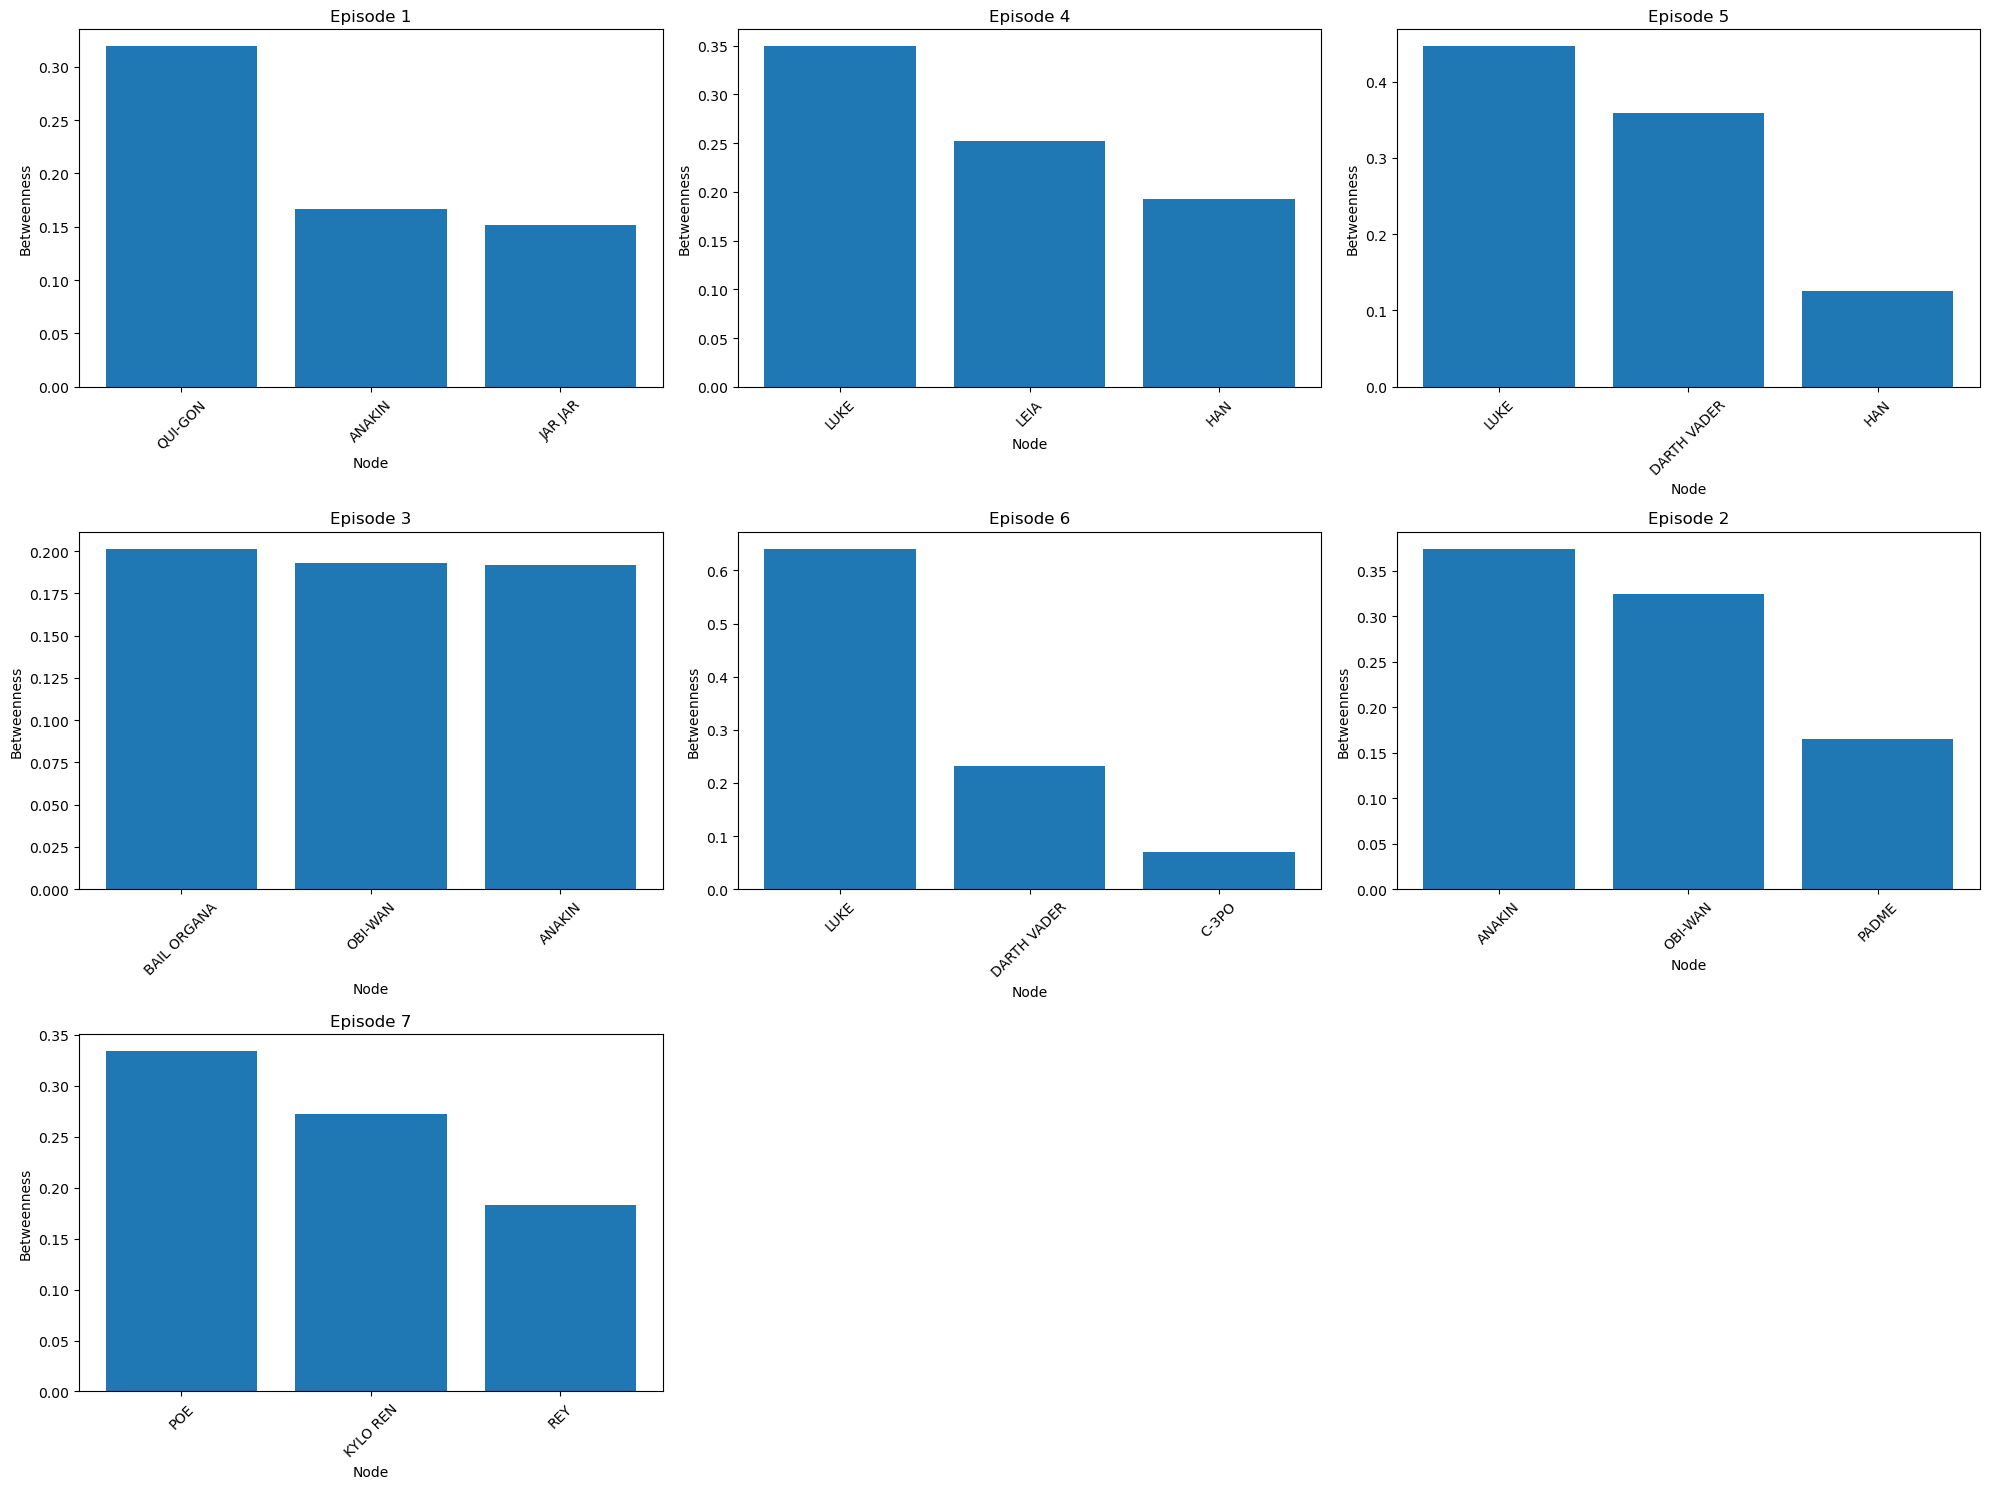

In [117]:
import os
import networkx as nx
import plots
importlib.reload(plots)
from plots import plot_centrality_over_time

# Filter interaction files
interaction_files = [
    f for f in os.listdir("data/")
    if "full" not in f and "interactions" in f and "allCharacters" not in f
]

plot_centrality_over_time(G, interaction_files, centrality_type="betweenness")

## Eigenvector
Whos connected to influential figures?

In [111]:
sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True)[:3]

[('ANAKIN', 0.33028154118446135),
 ('OBI-WAN', 0.29681361478887597),
 ('PADME', 0.2867273011130281)]

# Communities

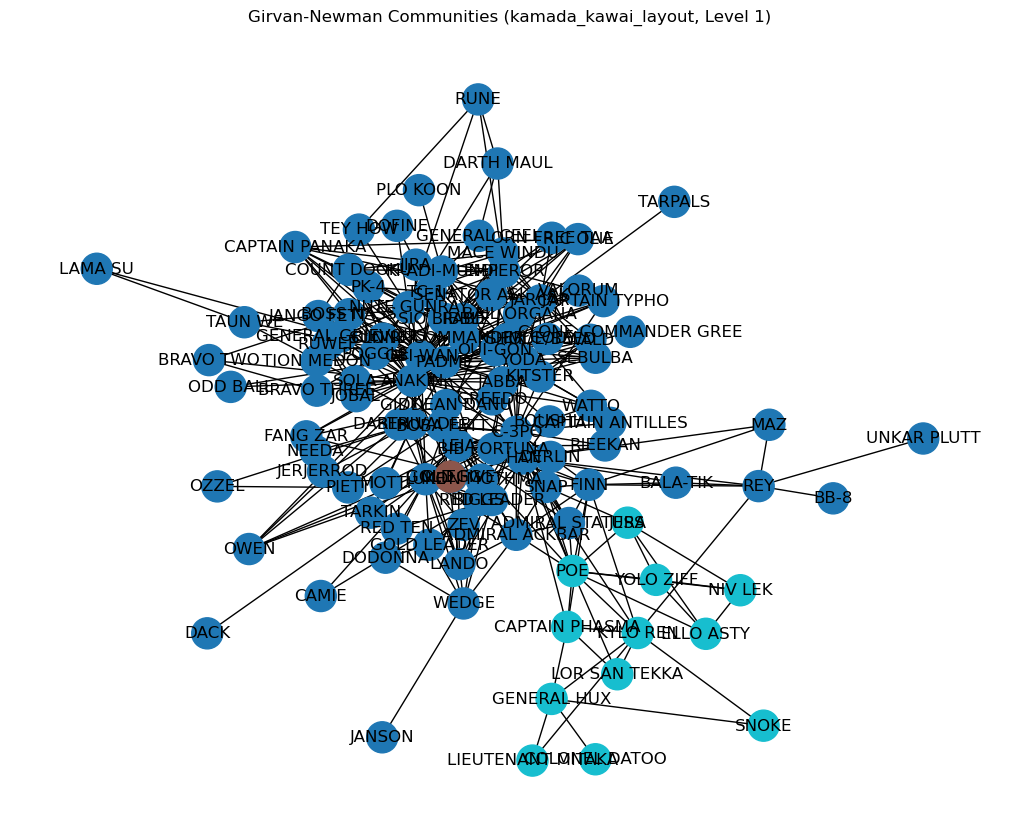

In [112]:
import plots
importlib.reload(plots)

communities = list(nx.community.girvan_newman(G))
plots.plot_girvan_newman_communities(G, layout="kamada_kawai_layout")


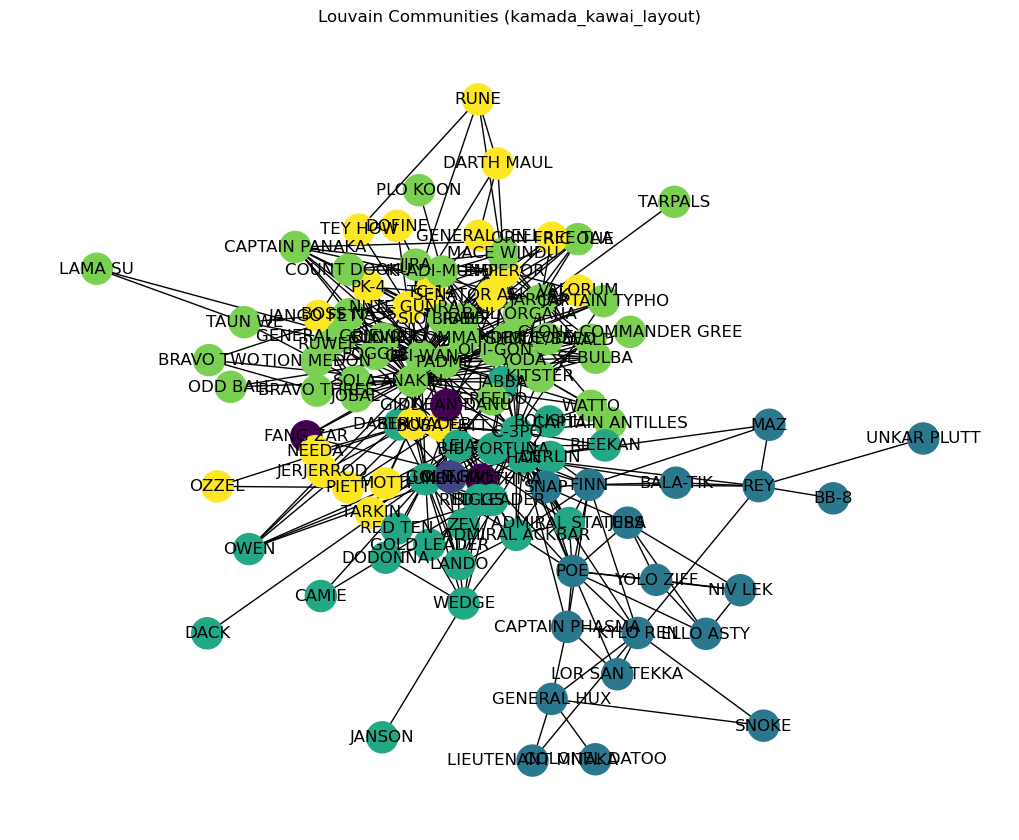

In [113]:
import plots
importlib.reload(plots)

plots.plot_louvain_communities(G, layout="kamada_kawai_layout")

# Correlations

**Person and Spearman**
- If the character appears in lot of scenes, does she also have a high centrality value?
  - There is a linear relationship between appearance and the centrality values

## Person and Spearman

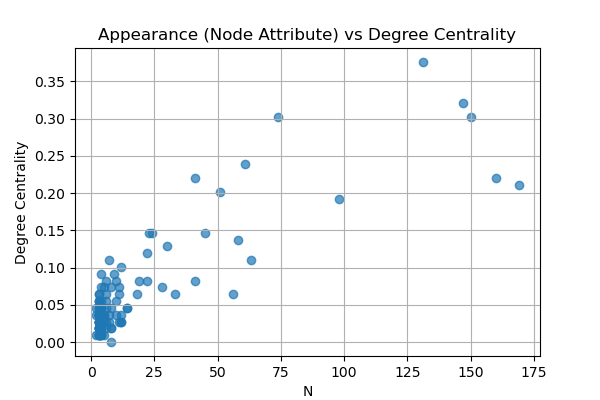

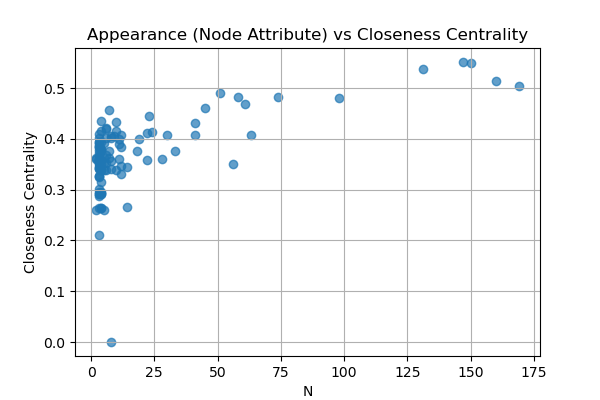

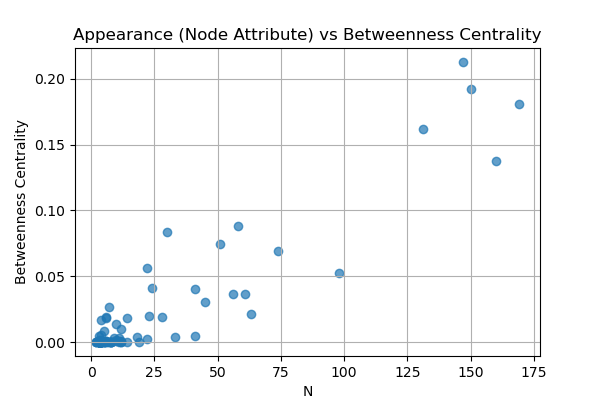

In [114]:
from IPython.display import Image, display
import correlations
importlib.reload(correlations)
from correlations import get_spearman_and_pearson_correlations

correlations = get_spearman_and_pearson_correlations(G)

for path in correlations["paths"]:
    display(Image(filename=path))

## Assortativity

- **What is assortativity?**  
  - A value between -1 and 1 that indicates the tendency of nodes to connect with other nodes of similar properties, such as degree.  
  - Positive values indicate assortative mixing (similar nodes connect to each other).  
  - Negative values indicate disassortative mixing (dissimilar nodes connect).

- **Do nodes tend to connect with others of similar degree?**  
  - The results are negative across all episodes, indicating disassortativity.  
  - Nodes with higher degrees tend to connect with nodes of lower degrees.  
  - This reflects a heterophilic network structure, where "opposites attract."

- **Does the connection pattern change over time?**  
  - The disassortative pattern varies slightly over time.  
  - The last episode, with the least negative assortativity value, suggests a weaker tendency for high-degree nodes to connect with low-degree nodes.  
  - This may indicate that main characters are less likely to connect with side characters in the final episode.

- **Do the results reflect the storyline (main characters connecting to side characters)?**  
  - Yes, the disassortative pattern aligns with the idea of main characters connecting with side characters throughout most episodes.  
  - In the last episode, this pattern appears less pronounced

In [115]:
interaction_file_names: List[str] = [i for i in os.listdir("data/") if "full" not in i and "interactions" in i and not "allCharacters" in i]
for interaction in interaction_file_names:
    G_tmp = nx.Graph(name="Interactions")
    G_tmp = utils.get_graph_with_nodes_and_edges(G_tmp, utils.load_json(f"data/{interaction}"))
    print("Episode:", interaction.split("-")[2])
    print("Assortivity:", nx.degree_assortativity_coefficient(G_tmp))

Episode: 1
Assortivity: -0.2570443846102701
Episode: 4
Assortivity: -0.21310401310401314
Episode: 5
Assortivity: -0.20024026302478548
Episode: 3
Assortivity: -0.30997757847533686
Episode: 6
Assortivity: -0.2919232162260049
Episode: 2
Assortivity: -0.27040593765212406
Episode: 7
Assortivity: -0.06006144393241334


In [116]:
interaction_file_names: List[str] = [i for i in os.listdir("data/") if "full" not in i and "interactions" in i and not "allCharacters" in i]
for interaction in interaction_file_names:
    G_tmp = nx.Graph(name="Interactions")
    G_tmp = utils.get_graph_with_nodes_and_edges(G_tmp, utils.load_json(f"data/{interaction}"))
    print("Episode:", interaction.split("-")[2])
    print("Assortivity:", nx.attribute_assortativity_coefficient(G_tmp, "value"))

Episode: 1
Assortivity: -0.07475510137663943
Episode: 4
Assortivity: -0.07253886010362695
Episode: 5
Assortivity: -0.0962566844919786
Episode: 3
Assortivity: -0.09221556886227547
Episode: 6
Assortivity: -0.10623946037099495
Episode: 2
Assortivity: -0.046807489198271705
Episode: 7
Assortivity: -0.07823718742262935
